# Chapter 14: Singular Value Decomposition

## Concepts

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# How numpy computes matrix rank

matrix_a = np.random.randn(3, 4)

def matrix_rank(M):
    S = np.linalg.svd(M, compute_uv=False)
    tol = S.max() * max(M.shape[-2:]) * np.finfo(S.dtype).eps
    return np.count_nonzero(S > tol)

rank_a = matrix_rank(matrix_a)
rank_b = np.linalg.matrix_rank(matrix_a)

check = rank_a == rank_b
print("My implementation for calculating matrix rank matches numpy's:", check)

My implementation for calculating matrix rank matches numpy's: True


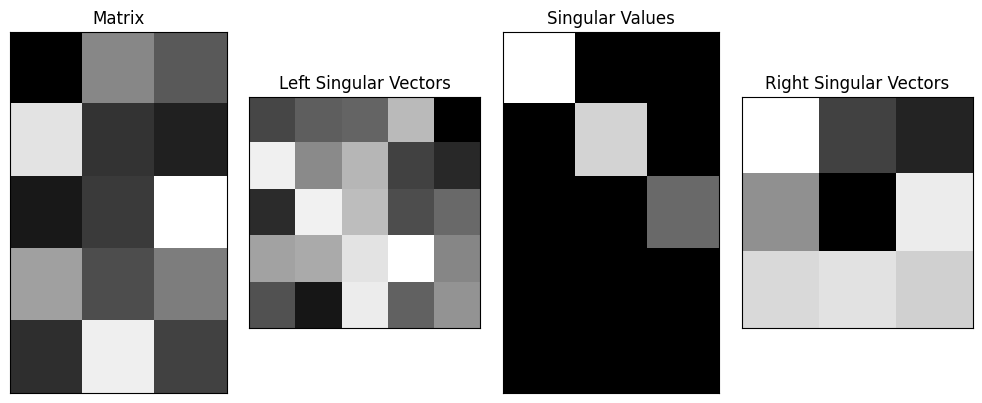

In [9]:
# Singular Value Decomposition (SVD)

matrix_a = np.random.randn(5, 3)

U, s, Vt = np.linalg.svd(matrix_a)

# Create singular values matrix
S = np.zeros(np.shape(matrix_a))
np.fill_diagonal(S, s)

# Create plot
fig, axis = plt.subplots(1, 4, figsize=(10, 4))
titles = ['Matrix', 'Left Singular Vectors', 'Singular Values', 'Right Singular Vectors']
matrices = [matrix_a, U, S, Vt]

for i, (title, matrix) in enumerate(zip(titles, matrices)):
    ax = axis[i]
    ax.imshow(matrix, cmap='gray')
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [21]:
# Symmetrical Matrix (Eigenvalues & Singular values are the same!)

matrix_a = np.random.randn(7, 3)
symmetrical_matrix_a = matrix_a.T @ matrix_a

sinvals = np.linalg.svd(symmetrical_matrix_a)[1]
evals = np.linalg.eig(symmetrical_matrix_a)[0]

check = np.allclose(np.sort(np.round(sinvals, 5)), np.sort(np.round(evals, 5)))
print("Singular values and Eigenvalues are the same for Symmetrical Matrix:", check)

Singular values and Eigenvalues are the same for Symmetrical Matrix: True


## Code Exercises

In [68]:
# Exercise 14-1 (Compare singular vectors and eigenvectors for a symmetrical matrix)

def compare_singular_vectors_and_eigenvectors(matrix):
    # eigendecomposition
    evals, evecs = np.linalg.eig(matrix)
    
    # Sort eigenvalues and evecs
    sort_index = np.argsort(np.abs(evals))[::-1]
    evals = evals[sort_index]
    evecs = evecs[:, sort_index]

    # SVD
    U, s, Vt = np.linalg.svd(matrix)

    # Allow for flexible sign comparison
    for i in range(len(s)):
        evecs[:, i] *= np.sign(evecs[0, i])  # Normalize sign based on first element
        U[:, i] *= np.sign(U[0, i])
        Vt[:, i] *= np.sign(Vt[0, i])

    # Compare Singular Vectors and Eigenvectors
    check_1 = np.allclose(np.abs(evecs), np.abs(U))
    check_2 = np.allclose(np.abs(evecs), np.abs(Vt.T))
    print("Singular vectors and eigenvectors are the same for the input matrix, disregarding sign:", check_1 and check_2)

# Create comparison for symmetrical matrix
matrix_a = np.random.randn(5,5)
symmetrical_matrix_a = matrix_a.T @ matrix_a
compare_singular_vectors_and_eigenvectors(symmetrical_matrix_a)

# Create comparison for symmetrical matrix using additive method
matrix_b = np.random.randn(5,5)
symmetrical_matrix_b = matrix_b.T + matrix_b
compare_singular_vectors_and_eigenvectors(symmetrical_matrix_b)

Singular vectors and eigenvectors are the same for the input matrix, disregarding sign: True
Singular vectors and eigenvectors are the same for the input matrix, disregarding sign: True


In [85]:
# Exercise 14-2 (Calculate economy singular value matrices using numpy)

def compute_economy_svd_and_validate_dimensions(matrix_a):
    """Compute the economy SVD of a non-square matrix A and validate dimensions."""
    # Compute the economy SVD
    U, s, Vt = np.linalg.svd(matrix_a, full_matrices=False)
    
    # Verify dimensions
    m, n = matrix_a.shape
    min_dim = min(m, n)
    correct_dimensions = (U.shape[1] == min_dim and Vt.shape[0] == min_dim and len(s) == min_dim)
    
    print(f"Dimensions correctly truncated to min(m, n): {correct_dimensions}")

# Example use
matrix_a = np.random.randn(10, 4)
compute_economy_svd_and_validate_dimensions(matrix_a)

matrix_b = np.random.randn(4, 10)
compute_economy_svd_and_validate_dimensions(matrix_b)

Dimensions correctly truncated to min(m, n): True
Dimensions correctly truncated to min(m, n): True


In [94]:
# Exercise 14-3 (Confirm that Singular Value Matrices rotate but do not scale vectors)

matrix_a = np.random.randn(5, 5)
vector_a = np.random.randn(5)
U, s, Vt = np.linalg.svd(matrix_a)

matrix_vector_product = U @ vector_a

check = np.linalg.norm(vector_a) == np.linalg.norm(matrix_vector_product)
print("Magnitudes of Random Vector and Singular Vector Matrix @ Random Vector are the same:", check)

Magnitudes of Random Vector and Singular Vector Matrix @ Random Vector are the same: True


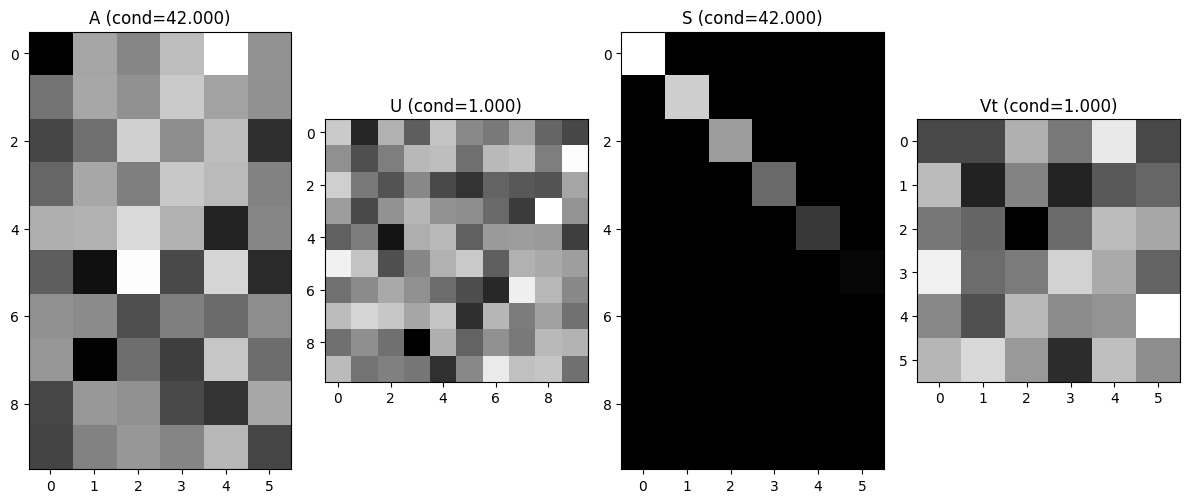

In [97]:
# Exercise 14-4 (Create a random tall matrix with a specified condition number)

import numpy as np
import matplotlib.pyplot as plt

# Set matrix dimensions and desired condition number
m = 10
n = 6
condnum = 42

# Create a random matrix and decompose it to get orthogonal matrices U and Vt
U, _, _ = np.linalg.svd(np.random.randn(m, m))
_, _, Vt = np.linalg.svd(np.random.randn(n, n))

# Create a singular values vector that linearly spans from the condition number to 1
s = np.linspace(condnum, 1, np.min((m, n)))

# Convert the singular values into a diagonal matrix S of appropriate size
S = np.zeros((m, n))
np.fill_diagonal(S, s)

# Create the matrix A by multiplying U, S, and Vt
A = U @ S @ Vt

# Visualization of the matrices and their condition numbers
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
titles = ['A', 'U', 'S', 'Vt']
matrices = [A, U, S, Vt]
conds = [np.linalg.cond(mat) for mat in matrices]

for ax, matrix, title, cond in zip(axs, matrices, titles, conds):
    im = ax.imshow(matrix, aspect='equal', cmap='gray')
    ax.set_title(f'{title} (cond={cond:.3f})')

plt.tight_layout()
plt.show()


In [ ]:
# Exercise 14-5 (Perform and visualize SVD on a smoothed random matrix)

In [ ]:
# Exercise 14-6 (Implement MP psuedo-inverse)

In [ ]:
# Exercise 14-7 (Confirm that the MP psuedo-inverse equals the left-inverse for a full column rank matrix)

In [ ]:
# Exercise 14-8 (Manipulating eigenvalue equation with psuedo-inverse)